# Ejercicio Práctica 1: primera toma de contacto con la optimización no lineal

Sea $a\geq 1$ el dígito más bajo de tu DNI y $b$ el más alto.
Define la función $$f(x) = (x^2 - a)^b$$


In [22]:
# Completar aquí
dni = "26649110"

# Convertir la cadena en una lista de enteros
dni_list = [int(digit) for digit in dni]

a = min(digit for digit in dni_list if digit >= 1)
b = max(dni_list)

print(f"a={a}\nb={b}")

def f(x):
    return (x**2-a)**b
# --------------------


a=1
b=9


Dibuja dicha función en el rango que consideres oportuno.
Usaremos dicho gráfico para guiarnos en el cálculo de sus mínimos.
Los resultados que mostraremos a partir de ahora se corresponden con $a = 2$ y $b = 4$.

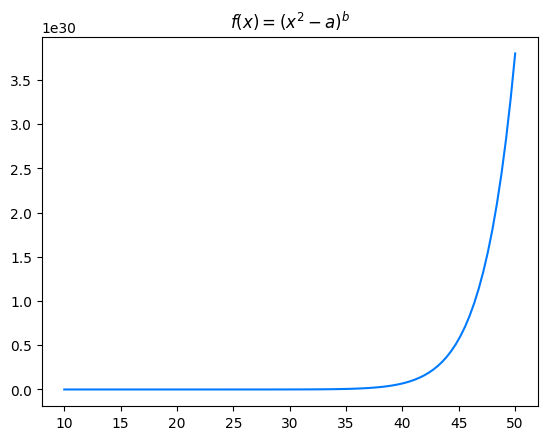

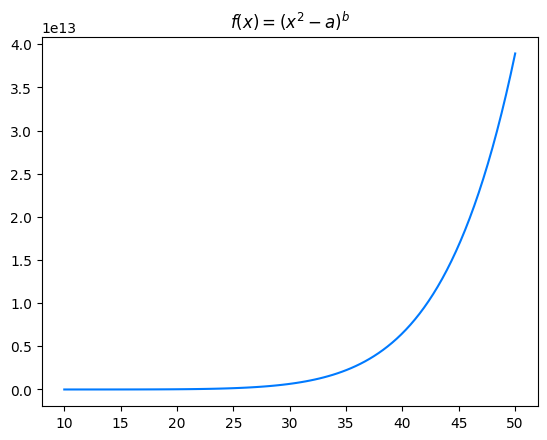

In [23]:
# Completar aquí
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(10, 50, 100)

# Primera figura
plt.plot(x, f(x), color='#007AFF')
plt.title(r"$f(x)=(x^2-a)^b$")
plt.show()

a = 2
b = 4

plt.plot(x, f(x), color='#007AFF')
plt.title(r"$f(x)=(x^2-a)^b$")
plt.show()
# --------------------


Utuliza la función **minimize** del submódulo **optimize** del módulo **scipy** con distintas inicializaciones para calcular los mínimos de la función definida anteriormente. 

In [24]:
# Completar aquí
from scipy.optimize import minimize

for i in range(-3, 4, 3):
    x0 = i
    res = minimize(f, x0, method='BFGS', 
                    options={'gtol': 1e-6, 'disp': True})
    print(f"Solución x = {res.x}")
# --------------------


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 52
         Gradient evaluations: 26
Solución x = [-1.4156768]
Optimization terminated successfully.
         Current function value: 16.000000
         Iterations: 0
         Function evaluations: 2
         Gradient evaluations: 1
Solución x = [0.]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 52
         Gradient evaluations: 26
Solución x = [1.41567678]


Consideremos ahora la función $$ f_1(x) = -\vert x - a \vert$$

Dibújala en un intervalo adecuado que te ayude a averiguar si se trata de 
una función coerciva. ¿Crees que se trata de una función coerciva? ¿Por qué?

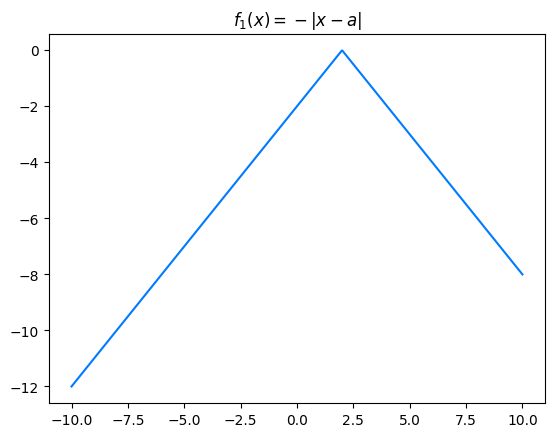

In [25]:
# Completar aquí
def f_1(x):
    return -abs(x-a)

x = np.linspace(-10, 10, 1000)

plt.plot(x, f_1(x), color='#007AFF')
plt.title(r"$f_1(x)=-|x-a|$")
plt.show()

# --------------------

No creo que se trate de una función coerciva ya que el valor absoluto de $x$ tiende a $-\infty$ debido al signo negativo delante del valor absoluto. 

Añade un término de regularización de la forma $b\vert x\vert$ y dibuja la nueva función regularizada.

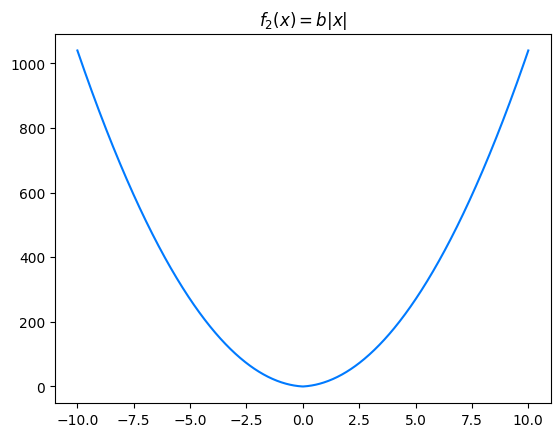

In [26]:
# Completar aquí
def f_1_reg(x):
    alpha = 10
    return b*abs(x) + alpha * x ** 2

x = np.linspace(-10, 10, 1000)
plt.plot(x, f_1_reg(x), color='#007AFF')
plt.title(r"$f_2(x)=b|x|$")
plt.show()
# --------------------


Resuelve el problema de minimización siguiente usando el método **golden** de **minimize_scalar**:

$$
\begin{cases}\text{Minimizar en } x\in\mathbb{R}: \quad f_{\text{reg}}(x) = f_1(x) + b\vert x\vert\end{cases}
$$

In [27]:
# Completar aquí
from scipy.optimize import minimize_scalar

def f_reg(x):
    return f_1(x) + b * abs(x)

res_2 = minimize_scalar(f_reg, method='golden')
print(f"Solución x = {res_2.x}")
# --------------------


Solución x = 2.7755575444292694e-17
